In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os.path

O Cenário anterior tinha o problema dos comboios muito compridos. Limitei o fluxo a 1980 veículos/hora em cada sentido. Comboios de no máximo 22 carros por faixa.

In [2]:
scenarios_folder = os.path.expanduser('~/Developer/interscsimulator/mock-simulators/smart_city_model/')
dr_events_filename_template = scenarios_folder + 'av_paulista_{}_scenario/events.xml'

In [3]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if child.attrib['type'] == 'arrival' and (len(prefix) == 0 or (prefix in child.attrib['person'])):
            # Sample arrival event:
            # <event time="918" type="arrival" person="paraiso5_79" vehicle="paraiso5_79" 
            #     link="40" legMode="car" trip_time="205" distance="2825" action="ok"/>

            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [4]:
dfs = []
scenarios = [
    'regular_1980_0', 
    'digital_rails_1980_0', 
    'digital_rails_1980_33', 
    'digital_rails_1980_66', 
    'digital_rails_1980_100'
]

names = ['re', 'dr_0', 'dr_33', 'dr_66', 'dr_100']

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s))
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=names)
df.describe()

re                        dr_0                       dr_33  \
       trip_time_s avg_speed_km/h  trip_time_s avg_speed_km/h  trip_time_s   
count  3960.000000    3960.000000  3960.000000    3960.000000  3960.000000   
mean    557.055808      18.168510   678.748990      14.917505   430.761869   
std      94.705209       3.222520   106.663795       2.925945   177.496343   
min     323.000000      12.540074   296.000000       9.981474   191.000000   
25%     482.750000      16.015748   629.000000      13.005115   205.000000   
50%     585.000000      17.092437   693.000000      14.528571   485.000000   
75%     625.250000      19.713929   753.000000      15.791925   579.000000   
max     811.000000      29.650146   950.000000      32.082019   778.000000   

                            dr_66                      dr_100                 
      avg_speed_km/h  trip_time_s avg_speed_km/h  trip_time_s avg_speed_km/h  
count    3960.000000  3960.000000    3960.000000  3960.000000    3960.000000  
mean       28.743946   288.793939      40.147437   198.000000      49.627915  
std        14.901928   132.285771      13.500858     7.000884       0.018161  
min        13.071979   191.000000      14.302262   191.000000      49.609756  
25%        17.325383   191.000000      23.113636   191.000000      49.609756  
50%        19.673029   205.000000      49.609756   198.000000      49.627915  
75%        49.609756   429.000000      49.646073   205.000000      49.646073  
max        49.646073   663.000000      49.646073   205.000000      49.646073

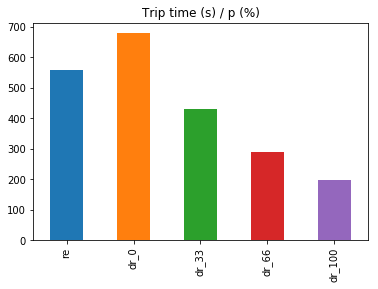

In [5]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time (s) / p (%)')

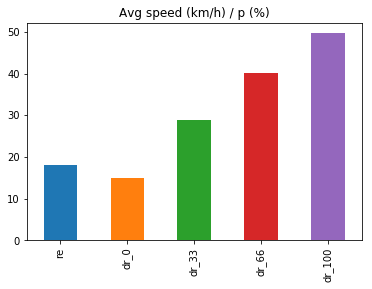

In [6]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed (km/h) / p (%)')

Text(0.5,0.98,'Trip time distributions / p')

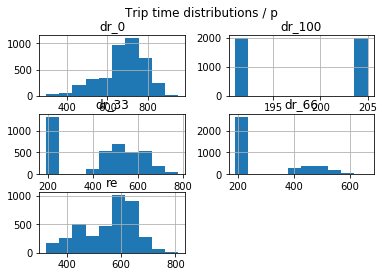

In [7]:
df.xs('trip_time_s', axis=1, level=1).hist()
plt.suptitle('Trip time distributions / p')

Text(0.5,0.98,'Trip time distributions / p')

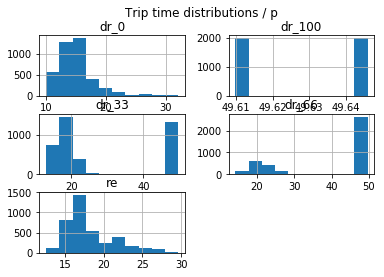

In [8]:
df.xs('avg_speed_km/h', axis=1, level=1).hist()
plt.suptitle('Trip time distributions / p')

In [9]:
dfs = []
scenarios = [
    'regular_1980_0', 
    'digital_rails_1980_0', 
    'digital_rails_1980_33', 
    'digital_rails_1980_66'
]
names = ['re', 'dr_0', 'dr_33', 'dr_66']

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s), 'regular')
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=names)
df.describe()

re                        dr_0                       dr_33  \
       trip_time_s avg_speed_km/h  trip_time_s avg_speed_km/h  trip_time_s   
count  3960.000000    3960.000000  3960.000000    3960.000000  2640.000000   
mean    557.055808      18.168510   678.748990      14.917505   547.142803   
std      94.705209       3.222520   106.663795       2.925945    81.178351   
min     323.000000      12.540074   296.000000       9.981474   297.000000   
25%     482.750000      16.015748   629.000000      13.005115   485.000000   
50%     585.000000      17.092437   693.000000      14.528571   540.000000   
75%     625.250000      19.713929   753.000000      15.791925   611.000000   
max     811.000000      29.650146   950.000000      32.082019   778.000000   

                            dr_66                 
      avg_speed_km/h  trip_time_s avg_speed_km/h  
count    2640.000000  1320.000000    1320.000000  
mean       18.301962   470.381818      21.186481  
std         2.431883    54.113768       2.722051  
min        13.071979   313.000000      14.302262  
25%        16.614899   429.000000      19.273171  
50%        18.027376   470.000000      20.840440  
75%        19.673029   505.000000      23.113636  
max        32.700965   663.000000      32.492013

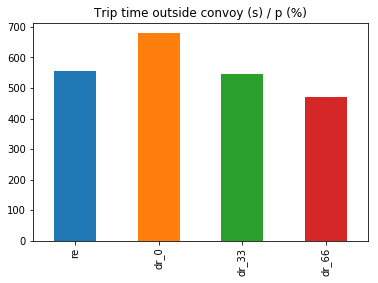

In [10]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time outside convoy (s) / p (%)')

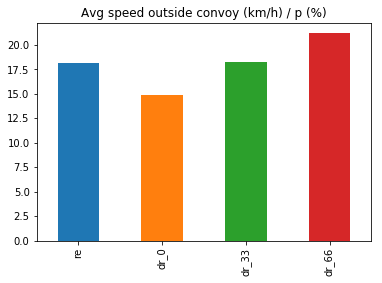

In [11]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed outside convoy (km/h) / p (%)')

Text(0.5,0.98,'Trip time distributions outside convoy / p')

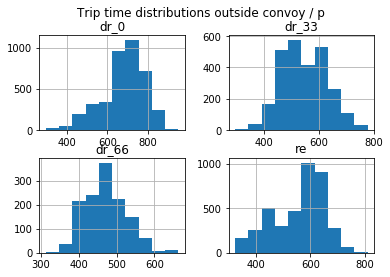

In [12]:
df.xs('trip_time_s', axis=1, level=1).hist()
plt.suptitle('Trip time distributions outside convoy / p')

Text(0.5,0.98,'Avg speed distributions outside convoy / p')

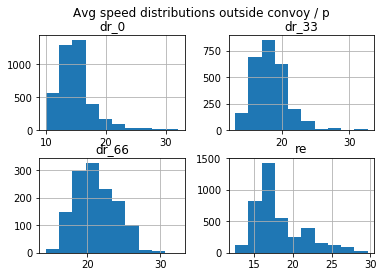

In [13]:
df.xs('avg_speed_km/h', axis=1, level=1).hist()
plt.suptitle('Avg speed distributions outside convoy / p')

- Parece que as velocidades estão ligeiramente baixas (A média da CET no horário de pico é de ~20km/h). Precisa calibrar o modelo?
- Aparentemente, aumentar a proporção de veículos nos DR aumenta a velocidade média. Isso pode ser um efeito do fato de eu ter esquecido de diferenciar a contagem entre veículos dentro e fora dos DR. Pode ser que, com mais veículos nos DR, sobre mais veículos "lentos" fora dos DR, abaixando a velocidade de cada veículo conforme o modelo de velocidades. Dá pra confirmar essa hipótese?